# Titanic Machine Learning from Disaster EDA

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Import DataSet

In [2]:
data_train=pd.read_csv("input/titanic/train.csv")
data_test=pd.read_csv("input/titanic/test.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## What is the percentage of survived?

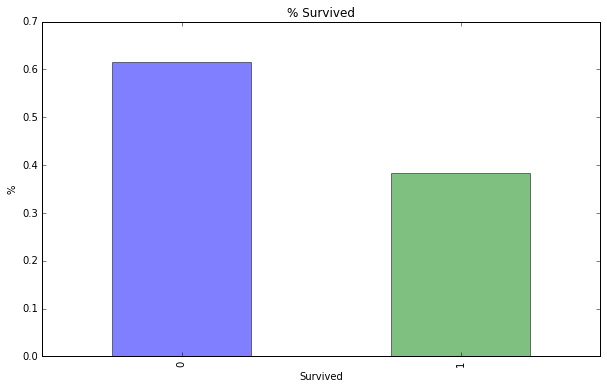

In [5]:
fig = plt.figure(figsize=(10,6))
data_train.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('% Survived')
plt.xlabel('Survived')
plt.ylabel('%')
plt.show()

## Exist relationships between others variables and survived

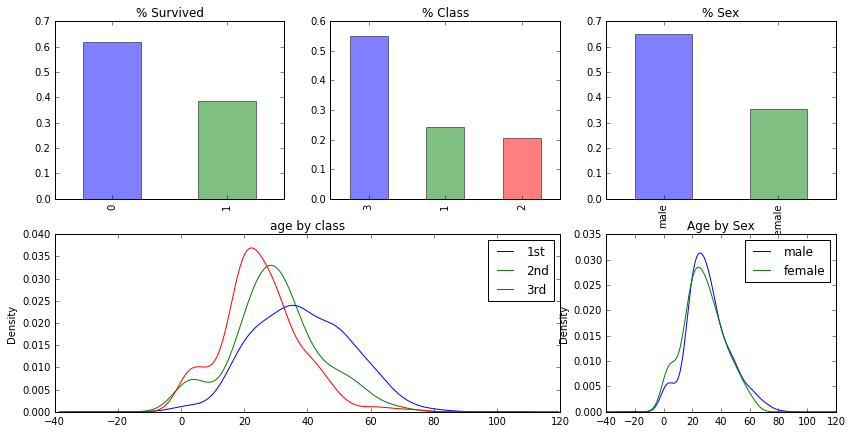

In [6]:
fig = plt.figure(figsize=(14,7))
plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('% Survived')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('% Class')

plt.subplot2grid((2,3),(0,2))
data_train.Sex.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.title('% Sex')

plt.subplot2grid((2,3),(1,0), colspan=2)
for i in [1,2,3]:
    data_train.Age[data_train.Pclass==i].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('age by class')

plt.subplot2grid((2,3),(1,2))
for i in ['male', 'female']:
    data_train.Age[data_train.Sex==i].plot(kind='kde')
plt.title('Age by Sex')
plt.legend(('male','female'))


plt.show()

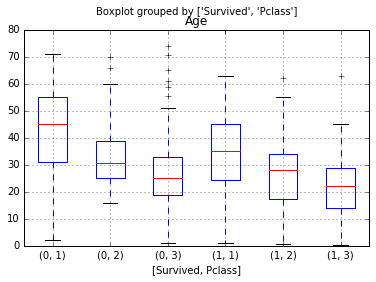

In [7]:
data_train.boxplot(column=['Age'], by=['Survived','Pclass']);

### What happend if have sibling and/or parents?
Check the graphics of survived with mix of these variables

## Missing treatment

### How many data are missing?

What is the variables with missing data?

In [8]:
pd.concat([pd.DataFrame(data_train.isna().sum()).T, pd.DataFrame(data_test.isna().sum()).T], axis=0, sort=False,
          keys=['Train', 'Test'])

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Train,0,0,0.0,0,0,0,177,0,0,0,0,687,2
Test,0,0,NaN,0,0,0,86,0,0,0,1,327,0


Acording with previous table is important fill NA in Age and Fare. For Dummy test is possible use the mean of the variable. Actually we should create a model like linear regression for both variables.

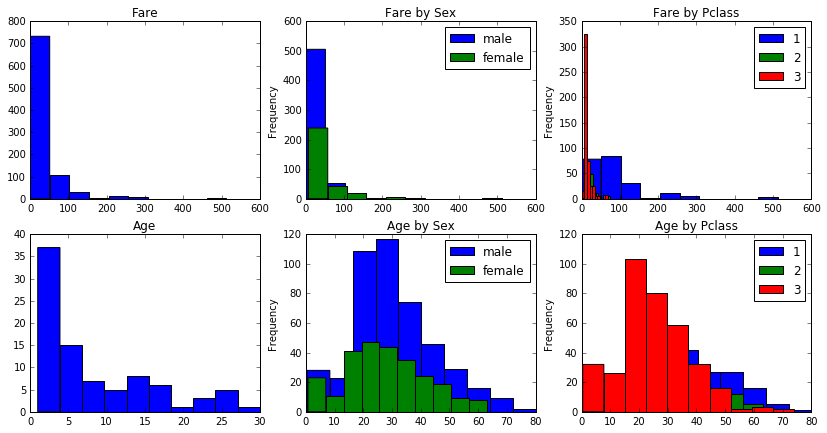

In [9]:
fig = plt.figure(figsize=(14,7))
plt.subplot2grid((2,3),(0,0))
plt.hist(data_train.Fare)
plt.title('Fare');

plt.subplot2grid((2,3),(0,1))
for i in ['male', 'female']:
    data_train.Fare[data_train.Sex==i].plot(kind='hist')
plt.title('Fare by Sex')
plt.legend(('male','female'));

plt.subplot2grid((2,3),(0,2))
for i in [1, 2, 3]:
    data_train.Fare[data_train.Pclass==i].plot(kind='hist')
plt.title('Fare by Pclass')
plt.legend(('1','2','3'));

plt.subplot2grid((2,3),(1,0))
plt.hist(data_train.Age.value_counts())
plt.title('Age');

plt.subplot2grid((2,3),(1,1))
for i in ['male', 'female']:
    data_train.Age[data_train.Sex==i].plot(kind='hist')
plt.title('Age by Sex')
plt.legend(('male','female'));

plt.subplot2grid((2,3),(1,2))
for i in [1, 2, 3]:
    data_train.Age[data_train.Pclass==i].plot(kind='hist')
plt.title('Age by Pclass')
plt.legend(('1','2','3'));

In [10]:
data_train.loc[data_train["Sex"] == "male", "Sex"] = 0
data_train.loc[data_train["Sex"] == "female", "Sex"] = 1

data_train["Embarked"] = data_train["Embarked"].fillna("S")
data_train.loc[data_train["Embarked"] == "S", "Embarked"] = 0
data_train.loc[data_train["Embarked"] == "C", "Embarked"] = 1
data_train.loc[data_train["Embarked"] == "Q", "Embarked"] = 2

#### Linear regression for Fare
Use variables Sex, Pclass Sibsp and Parch create the linear model for Fare

In [11]:
reg_Fare=sm.OLS(data_train["Fare"],data_train[["Sex","Pclass", "SibSp", "Parch"]], missing='drop').fit()
print(reg_Fare.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     82.35
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           1.81e-59
Time:                        16:40:17   Log-Likelihood:                -4759.6
No. Observations:                 891   AIC:                             9527.
Df Residuals:                     887   BIC:                             9546.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sex           28.5116      3.496      8.156      0.0

The R-squared (or adj) indicate this model only explain less 30% of variance the Fare then not is possible use this model to fill the variable. Now used the dummy option mean of Fare to fill data.

#### Linear regression for Age
Using Sex, Pclass, SibSp, Parch and Fare create linear model to fill NA in Age

In [12]:
reg_Age=sm.OLS(data_train["Age"],data_train[["Sex","Pclass", "SibSp", "Parch", "Fare"]], missing='drop').fit()
print(reg_Age.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     347.9
Date:                Tue, 06 Nov 2018   Prob (F-statistic):          4.72e-188
Time:                        16:40:17   Log-Likelihood:                -3068.4
No. Observations:                 714   AIC:                             6147.
Df Residuals:                     709   BIC:                             6170.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sex            3.4141      1.410      2.421      0.0

In this case the linear model is a good aproximation for Age (more 70% of variance)

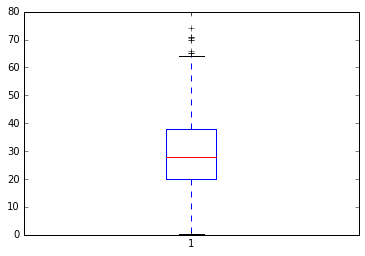

In [27]:
B=plt.boxplot(data_train.Age.dropna().values);

In [40]:
bound=[item.get_ydata()[1] for item in B['whiskers']] # Obtain the upper bound in boxplot diagram
bound[1]

64.0

In [ ]:
reg_Age=sm.OLS(data_train["Age"],data_train[["Sex","Pclass", "SibSp", "Parch", "Fare"]], missing='drop').fit()
print(reg_Age.summary())

In [ ]:
data_train["Fare"] = data_train["Fare"].fillna(reg_Fare.predict(data_train[["Sex","Pclass", "SibSp", "Parch"]]))
data_train["Age"] = data_train["Age"].fillna(reg_Age.predict(data_train[["Sex","Pclass", "SibSp", "Parch", "Fare"]]))


## Decision tree


In [ ]:
from sklearn import tree

In [ ]:
target = data_train["Survived"].values
features = data_train[["Pclass", "Sex", "Age", "Fare"]].values

Create decision tree with Pclass, Sex, Age and Fare like endogenous variable. Use max_depth = 3 and min_samples_split = 100.

In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=100, random_state = 1)
decision_tree = decision_tree.fit(features, target)

print(decision_tree.feature_importances_)
print(decision_tree.score(features, target))

In [ ]:
data_test.loc[data_test["Sex"] == "male", "Sex"] = 0
data_test.loc[data_test["Sex"] == "female", "Sex"] = 1

data_test["Embarked"] = data_test["Embarked"].fillna("S")
data_test.loc[data_test["Embarked"] == "S", "Embarked"] = 0
data_test.loc[data_test["Embarked"] == "C", "Embarked"] = 1
data_test.loc[data_test["Embarked"] == "Q", "Embarked"] = 2

In [ ]:
data_test["Fare"] = data_test["Fare"].fillna(data_train["Fare"].dropna().median())
data_test["Age"] = data_test["Age"].fillna(reg_Age.predict(data_test[["Sex","Pclass", "SibSp", "Parch", "Fare"]]))

In [ ]:
test_features = data_test[["Pclass", "Sex", "Age", "Fare"]].values
prediction = decision_tree.predict(test_features)

### Export prediction to CSV

In [ ]:
PassengerId = np.array(data_test["PassengerId"]).astype(int)
solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
solution.to_csv("kaggle_python.csv", index_label = ["PassengerId"])